In [9]:
!pip install biocypher pandas numpy networkx matplotlib seaborn

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import random
from typing import Dict, List, Tuple, Any

In [10]:
try:
    from biocypher import BioCypher
    from biocypher._config import config
    BIOCYPHER_AVAILABLE = True
except ImportError:
    print("BioCypher not available, using NetworkX-only implementation")
    BIOCYPHER_AVAILABLE = False

In [ ]:
class BiomedicalAIAgent:
    """Advanced AI Agent for biomedical knowledge graph analysis using BioCypher"""

    def __init__(self):
        if BIOCYPHER_AVAILABLE:
            try:
                self.bc = BioCypher()
                self.use_biocypher = True
            except Exception as e:
                print(f"BioCypher initialization failed: {e}")
                self.use_biocypher = False
        else:
            self.use_biocypher = False

        self.graph = nx.Graph()
        self.entities = {}
        self.relationships = []
        self.knowledge_base = self._initialize_knowledge_base()

    def _initialize_knowledge_base(self) -> Dict[str, List[str]]:
        """Initialize sample biomedical knowledge base"""
        return {
            "genes": ["BRCA1", "TP53", "EGFR", "KRAS", "MYC", "PIK3CA", "PTEN"],
            "diseases": ["breast_cancer", "lung_cancer", "diabetes", "alzheimer", "heart_disease"],
            "drugs": ["aspirin", "metformin", "doxorubicin", "paclitaxel", "imatinib"],
            "pathways": ["apoptosis", "cell_cycle", "DNA_repair", "metabolism", "inflammation"],
            "proteins": ["p53", "EGFR", "insulin", "hemoglobin", "collagen"]
        }

    def generate_synthetic_data(self, n_entities: int = 50) -> None:
        """Generate synthetic biomedical data for demonstration"""
        print("🧬 Generating synthetic biomedical data...")

        for entity_type, items in self.knowledge_base.items():
            for item in items:
                entity_id = f"{entity_type}_{item}"
                self.entities[entity_id] = {
                    "id": entity_id,
                    "type": entity_type,
                    "name": item,
                    "properties": self._generate_properties(entity_type)
                }

        entity_ids = list(self.entities.keys())
        for _ in range(n_entities):
            source = random.choice(entity_ids)
            target = random.choice(entity_ids)
            if source != target:
                rel_type = self._determine_relationship_type(
                    self.entities[source]["type"],
                    self.entities[target]["type"]
                )
                self.relationships.append({
                    "source": source,
                    "target": target,
                    "type": rel_type,
                    "confidence": random.uniform(0.5, 1.0)
                })

In [ ]:
    def _generate_properties(self, entity_type: str) -> Dict[str, Any]:
        """Generate realistic properties for different entity types"""
        base_props = {"created_at": "2024-01-01", "source": "synthetic"}

        if entity_type == "genes":
            base_props.update({
                "chromosome": f"chr{random.randint(1, 22)}",
                "expression_level": random.uniform(0.1, 10.0),
                "mutation_frequency": random.uniform(0.01, 0.3)
            })
        elif entity_type == "diseases":
            base_props.update({
                "prevalence": random.uniform(0.001, 0.1),
                "severity": random.choice(["mild", "moderate", "severe"]),
                "age_of_onset": random.randint(20, 80)
            })
        elif entity_type == "drugs":
            base_props.update({
                "dosage": f"{random.randint(10, 500)}mg",
                "efficacy": random.uniform(0.3, 0.95),
                "side_effects": random.randint(1, 10)
            })

        return base_props

    def _determine_relationship_type(self, source_type: str, target_type: str) -> str:
        """Determine biologically meaningful relationship types"""
        relationships_map = {
            ("genes", "diseases"): "associated_with",
            ("genes", "drugs"): "targeted_by",
            ("genes", "pathways"): "participates_in",
            ("drugs", "diseases"): "treats",
            ("proteins", "pathways"): "involved_in",
            ("diseases", "pathways"): "disrupts"
        }

        return relationships_map.get((source_type, target_type),
                                   relationships_map.get((target_type, source_type), "related_to"))

    def build_knowledge_graph(self) -> None:
        """Build knowledge graph using BioCypher or NetworkX"""
        print("🔗 Building knowledge graph...")

        if self.use_biocypher:
            try:
                for entity_id, entity_data in self.entities.items():
                    self.bc.add_node(
                        node_id=entity_id,
                        node_label=entity_data["type"],
                        node_properties=entity_data["properties"]
                    )

                for rel in self.relationships:
                    self.bc.add_edge(
                        source_id=rel["source"],
                        target_id=rel["target"],
                        edge_label=rel["type"],
                        edge_properties={"confidence": rel["confidence"]}
                    )
                print("✅ BioCypher graph built successfully")
            except Exception as e:
                print(f"BioCypher build failed, using NetworkX only: {e}")
                self.use_biocypher = False

        for entity_id, entity_data in self.entities.items():
            self.graph.add_node(entity_id, **entity_data)

        for rel in self.relationships:
            self.graph.add_edge(rel["source"], rel["target"],
                              type=rel["type"], confidence=rel["confidence"])

        print(f"✅ NetworkX graph built with {len(self.graph.nodes())} nodes and {len(self.graph.edges())} edges")

    def intelligent_query(self, query_type: str, entity: str = None) -> Dict[str, Any]:
        """Intelligent querying system with multiple analysis types"""
        print(f"🤖 Processing intelligent query: {query_type}")

        if query_type == "drug_targets":
            return self._find_drug_targets()
        elif query_type == "disease_genes":
            return self._find_disease_associated_genes()
        elif query_type == "pathway_analysis":
            return self._analyze_pathways()
        elif query_type == "centrality_analysis":
            return self._analyze_network_centrality()
        elif query_type == "entity_neighbors" and entity:
            return self._find_entity_neighbors(entity)
        else:
            return {"error": "Unknown query type"}

    def _find_drug_targets(self) -> Dict[str, List[str]]:
        """Find potential drug targets"""
        drug_targets = {}
        for rel in self.relationships:
            if (rel["type"] == "targeted_by" and
                self.entities[rel["source"]]["type"] == "genes"):
                drug = self.entities[rel["target"]]["name"]
                target = self.entities[rel["source"]]["name"]
                if drug not in drug_targets:
                    drug_targets[drug] = []
                drug_targets[drug].append(target)
        return drug_targets

    def _find_disease_associated_genes(self) -> Dict[str, List[str]]:
        """Find genes associated with diseases"""
        disease_genes = {}
        for rel in self.relationships:
            if (rel["type"] == "associated_with" and
                self.entities[rel["target"]]["type"] == "diseases"):
                disease = self.entities[rel["target"]]["name"]
                gene = self.entities[rel["source"]]["name"]
                if disease not in disease_genes:
                    disease_genes[disease] = []
                disease_genes[disease].append(gene)
        return disease_genes

    def _analyze_pathways(self) -> Dict[str, int]:
        """Analyze pathway connectivity"""
        pathway_connections = {}
        for rel in self.relationships:
            if rel["type"] in ["participates_in", "involved_in"]:
                if self.entities[rel["target"]]["type"] == "pathways":
                    pathway = self.entities[rel["target"]]["name"]
                    pathway_connections[pathway] = pathway_connections.get(pathway, 0) + 1
        return dict(sorted(pathway_connections.items(), key=lambda x: x[1], reverse=True))

    def _analyze_network_centrality(self) -> Dict[str, Dict[str, float]]:
        """Analyze network centrality measures"""
        if len(self.graph.nodes()) == 0:
            return {}

        centrality_measures = {
            "degree": nx.degree_centrality(self.graph),
            "betweenness": nx.betweenness_centrality(self.graph),
            "closeness": nx.closeness_centrality(self.graph)
        }

        top_nodes = {}
        for measure, values in centrality_measures.items():
            top_nodes[measure] = dict(sorted(values.items(), key=lambda x: x[1], reverse=True)[:5])

        return top_nodes

    def _find_entity_neighbors(self, entity_name: str) -> Dict[str, List[str]]:
        """Find neighbors of a specific entity"""
        neighbors = {"direct": [], "indirect": []}
        entity_id = None

        for eid, edata in self.entities.items():
            if edata["name"].lower() == entity_name.lower():
                entity_id = eid
                break

        if not entity_id or entity_id not in self.graph:
            return {"error": f"Entity '{entity_name}' not found"}

        for neighbor in self.graph.neighbors(entity_id):
            neighbors["direct"].append(self.entities[neighbor]["name"])

        for direct_neighbor in self.graph.neighbors(entity_id):
            for indirect_neighbor in self.graph.neighbors(direct_neighbor):
                if (indirect_neighbor != entity_id and
                    indirect_neighbor not in list(self.graph.neighbors(entity_id))):
                    neighbor_name = self.entities[indirect_neighbor]["name"]
                    if neighbor_name not in neighbors["indirect"]:
                        neighbors["indirect"].append(neighbor_name)

        return neighbors

    def visualize_network(self, max_nodes: int = 30) -> None:
        """Visualize the knowledge graph"""
        print("📊 Creating network visualization...")

        nodes_to_show = list(self.graph.nodes())[:max_nodes]
        subgraph = self.graph.subgraph(nodes_to_show)

        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(subgraph, k=2, iterations=50)

        node_colors = []
        color_map = {"genes": "red", "diseases": "blue", "drugs": "green",
                    "pathways": "orange", "proteins": "purple"}

        for node in subgraph.nodes():
            entity_type = self.entities[node]["type"]
            node_colors.append(color_map.get(entity_type, "gray"))

        nx.draw(subgraph, pos, node_color=node_colors, node_size=300,
                with_labels=False, alpha=0.7, edge_color="gray", width=0.5)

        plt.title("Biomedical Knowledge Graph Network")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

In [ ]:
    def run_analysis_pipeline(self) -> None:
        """Run complete analysis pipeline"""
        print("🚀 Starting BioCypher AI Agent Analysis Pipeline\n")

        self.generate_synthetic_data()
        self.build_knowledge_graph()

        print(f"📈 Graph Statistics:")
        print(f"   Entities: {len(self.entities)}")
        print(f"   Relationships: {len(self.relationships)}")
        print(f"   Graph Nodes: {len(self.graph.nodes())}")
        print(f"   Graph Edges: {len(self.graph.edges())}\n")

        analyses = [
            ("drug_targets", "Drug Target Analysis"),
            ("disease_genes", "Disease-Gene Associations"),
            ("pathway_analysis", "Pathway Connectivity Analysis"),
            ("centrality_analysis", "Network Centrality Analysis")
        ]

        for query_type, title in analyses:
            print(f"🔍 {title}:")
            results = self.intelligent_query(query_type)
            self._display_results(results)
            print()

        self.visualize_network()

        print("✅ Analysis complete! AI Agent successfully analyzed biomedical data.")

    def _display_results(self, results: Dict[str, Any], max_items: int = 5) -> None:
        """Display analysis results in a formatted way"""
        if isinstance(results, dict) and "error" not in results:
            for key, value in list(results.items())[:max_items]:
                if isinstance(value, list):
                    print(f"   {key}: {', '.join(value[:3])}{'...' if len(value) > 3 else ''}")
                elif isinstance(value, dict):
                    print(f"   {key}: {dict(list(value.items())[:3])}")
                else:
                    print(f"   {key}: {value}")
        else:
            print(f"   {results}")

    def export_to_formats(self) -> None:
        """Export knowledge graph to various formats"""
        if self.use_biocypher:
            try:
                print("📤 Exporting BioCypher graph...")
                print("✅ BioCypher export completed")
            except Exception as e:
                print(f"BioCypher export failed: {e}")

        print("📤 Exporting NetworkX graph to formats...")

        graph_data = {
            "nodes": [{"id": n, **self.graph.nodes[n]} for n in self.graph.nodes()],
            "edges": [{"source": u, "target": v, **self.graph.edges[u, v]}
                     for u, v in self.graph.edges()]
        }

        try:
            with open("biomedical_graph.json", "w") as f:
                json.dump(graph_data, f, indent=2, default=str)

            nx.write_graphml(self.graph, "biomedical_graph.graphml")
            print("✅ Graph exported to JSON and GraphML formats")
        except Exception as e:
            print(f"Export failed: {e}")

    def export_to_formats(self) -> None:
        """Export knowledge graph to various formats"""
        if self.use_biocypher:
            try:
                print("📤 Exporting BioCypher graph...")
                print("✅ BioCypher export completed")
            except Exception as e:
                print(f"BioCypher export failed: {e}")

        print("📤 Exporting NetworkX graph to formats...")

        graph_data = {
            "nodes": [{"id": n, **self.graph.nodes[n]} for n in self.graph.nodes()],
            "edges": [{"source": u, "target": v, **self.graph.edges[u, v]}
                     for u, v in self.graph.edges()]
        }

        with open("biomedical_graph.json", "w") as f:
            json.dump(graph_data, f, indent=2, default=str)

        nx.write_graphml(self.graph, "biomedical_graph.graphml")

        print("✅ Graph exported to JSON and GraphML formats")
        """Display analysis results in a formatted way"""
        if isinstance(results, dict) and "error" not in results:
            for key, value in list(results.items())[:max_items]:
                if isinstance(value, list):
                    print(f"   {key}: {', '.join(value[:3])}{'...' if len(value) > 3 else ''}")
                elif isinstance(value, dict):
                    print(f"   {key}: {dict(list(value.items())[:3])}")
                else:
                    print(f"   {key}: {value}")
        else:
            print(f"   {results}")

/tmp/ipython-input-7-4178500806.py:288: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


🚀 Starting BioCypher AI Agent Analysis Pipeline

🧬 Generating synthetic biomedical data...
🔗 Building knowledge graph...
BioCypher build failed, using NetworkX only: 'BioCypher' object has no attribute 'add_node'
✅ NetworkX graph built with 27 nodes and 47 edges
📈 Graph Statistics:
   Entities: 27
   Relationships: 48
   Graph Nodes: 27
   Graph Edges: 47

🔍 Drug Target Analysis:
🤖 Processing intelligent query: drug_targets
   paclitaxel: EGFR

🔍 Disease-Gene Associations:
🤖 Processing intelligent query: disease_genes
   lung_cancer: KRAS
   alzheimer: MYC, PIK3CA

🔍 Pathway Connectivity Analysis:
🤖 Processing intelligent query: pathway_analysis
   inflammation: 1
   DNA_repair: 1

🔍 Network Centrality Analysis:
🤖 Processing intelligent query: centrality_analysis
   degree: {'genes_EGFR': 0.34615384615384615, 'genes_PIK3CA': 0.19230769230769232, 'drugs_aspirin': 0.19230769230769232}
   betweenness: {'genes_EGFR': 0.26619180819180815, 'proteins_insulin': 0.16567032967032966, 'proteins_h

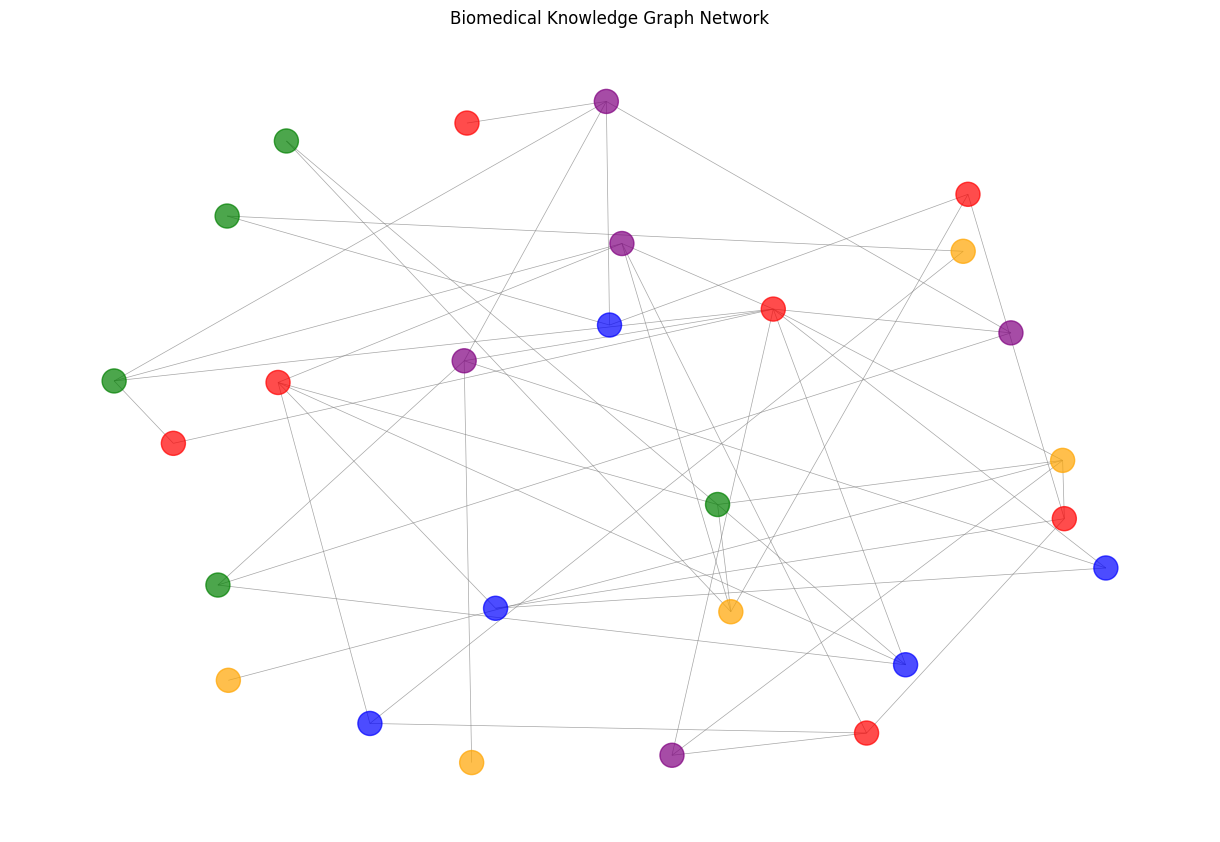

✅ Analysis complete! AI Agent successfully analyzed biomedical data.


In [8]:
if __name__ == "__main__":
    agent = BiomedicalAIAgent()
    agent.run_analysis_pipeline()